
# Project: Investigate a Dataset (No Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


Introductions :

Questions we are trying to answer :

1 - What is the rating for No-Show gender patients?

2 - What is age rating of Alcoholism for the patient they show?

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [26]:
# Load the data. 
df = pd.read_csv('noshowappointments.csv')

In [27]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [28]:
# there is no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> 
### Data Cleaning (Show the data)

In [29]:
#deal with names
df.rename(columns = {'patient_id':'IDpatient','appointment_day': 'Idappointment', 'gender': 'Gender','scheduled_day': 'Scheduled_Day','appointment_day': 'Appointment_Day','age': 'Age','neighbourhood': 'Neighbourhood','scholarship': 'Scholarship','No-show': 'no_show'}
          , inplace = True)

In [30]:
#size of the dataset
df.shape

(110527, 14)


110527 records and 14 columns in the dataset.

In [31]:
#To make data clear and easy to use
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['PatientId'] = df['PatientId'].astype('int64')
df['make_show_easy'] = np.where(df['no_show']=='Yes', 1, 0)

In [32]:
# Create awaiting_time_days column
df['awaiting_time_days'] = (df.AppointmentDay - df.ScheduledDay).dt.days

In [33]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,make_show_easy,awaiting_time_days
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933,9.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,15.254996
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,178.000000


In [34]:
df['Age'].mean()

37.08887421173107

In [35]:
# to make sure all patient in real age
df = df[(df.Age >= 0) & (df.Age <= 115)]

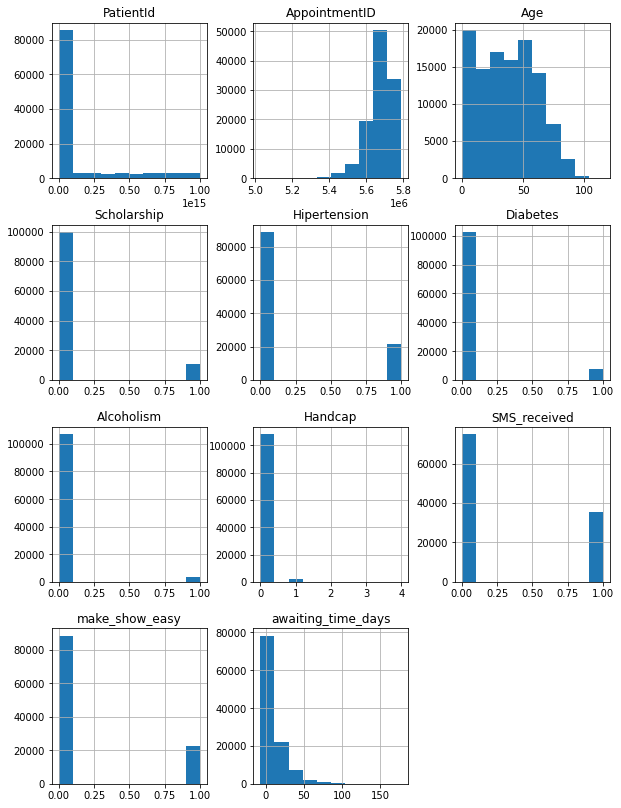

In [36]:
df.hist(figsize=(10,14));

Histogram observations
- Age: There are many very young people in the dataset but in general the patients age is distributed evenly and the number of patients goes drastricly down for patients older than 60 years.

- Alcoholism: Most of the patients are not alcoholics.

- Diabetes: Most of the patients are not diabetes but more than alcoholics.

- Handicap: There are for handicap categories with most of the people not being handicapted.

- Hypertension: Most patients do not have hypertension diagnosed.

In [37]:
# Print Unique Values
print("Unique Values in `scholarship` => {}".format(df.Scholarship.unique()))

Unique Values in `scholarship` => [0 1]


In [38]:
# Print Unique Values
print("Unique Values in `hypertension` => {}".format(df.Hipertension.unique()))

Unique Values in `hypertension` => [1 0]


In [39]:
# Print Unique Values
print("Unique Values in `diabetes` => {}".format(df.Diabetes.unique()))

Unique Values in `diabetes` => [0 1]


In [40]:
# Print Unique Values
print("Unique Values in `alcoholism` => {}".format(df.Alcoholism.unique()))

Unique Values in `alcoholism` => [0 1]


In [41]:
df.Handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [42]:
print("Unique Values in `awaiting_time_days` => {}".format(df.awaiting_time_days.unique()))

Unique Values in `awaiting_time_days` => [ -1   1   2   0   3   8  28   9  22  10  17  16  13  27  23  20  14  15
  21  42  29  30  41  31  55  44  45  38  36  37  43  49  59  51  52  64
  66  90  65  83  77  86 114 108  62  69  71  56  57  50  58  40  48  72
  63  19  32  33   5  34  35  11  12  39  46   7   4   6  24  25  47  26
  18  60  54  61 175  53  76  68  82  75  88  80 102  78  67  74  84 111
  -2  79  85  97  93 141 154 161 168 103 132 124  95  87  89 150 125 126
 110 118  73  70  81 107 109 101 121 100 104  91  96  92 106  94  -7 138
 131 178 116 145 122]


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the rating for No-Show gender patients?)

In [43]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,make_show_easy,awaiting_time_days
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,-1
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,-1
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,-1
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,-1
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,-1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   PatientId           110526 non-null  int64              
 1   AppointmentID       110526 non-null  int64              
 2   Gender              110526 non-null  object             
 3   ScheduledDay        110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay      110526 non-null  datetime64[ns, UTC]
 5   Age                 110526 non-null  int64              
 6   Neighbourhood       110526 non-null  object             
 7   Scholarship         110526 non-null  int64              
 8   Hipertension        110526 non-null  int64              
 9   Diabetes            110526 non-null  int64              
 10  Alcoholism          110526 non-null  int64              
 11  Handcap             110526 non-null  int64              
 12  SMS_received    

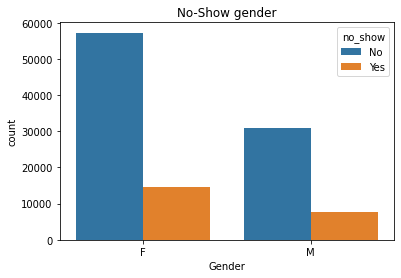

In [45]:
ax = sns.countplot(x=df.Gender, hue=df.no_show, data=df)
ax.set_title("No-Show gender")
x_ticks_labels=['Female', 'Male']
plt.show();

In [46]:
print('females appointments {} , missed {} with the ratio {}%'.format(len(df.loc[df['Gender'] == "F"]), len(df.query('no_show == "Yes" and Gender == "F"')), int(round(len(df.query('no_show == "Yes" and Gender == "F"'))/len(df.loc[df['Gender'] == "F"])*100))))
print('Male appointments {} , missed {} with the ratio {}%'.format(len(df.loc[df['Gender'] == "M"]), len(df.loc[(df['Gender'] == "M") & (df['no_show'] == "Yes")]), int(round(len(df.loc[(df['Gender'] == "M") & (df['no_show'] == "Yes")])/len(df.loc[df['Gender'] == "M"])*100))))

females appointments 71839 , missed 14594 with the ratio 20%
Male appointments 38687 , missed 7725 with the ratio 20%


### Research Question 2  (What is age rating of Alcoholism for the patient they show?)

In [47]:
df[['Alcoholism', 'make_show_easy']].groupby(['Alcoholism'], as_index=False).mean().sort_values(by='make_show_easy', ascending=False)

,Alcoholism,make_show_easy
0,0,0.201948
1,1,0.201488


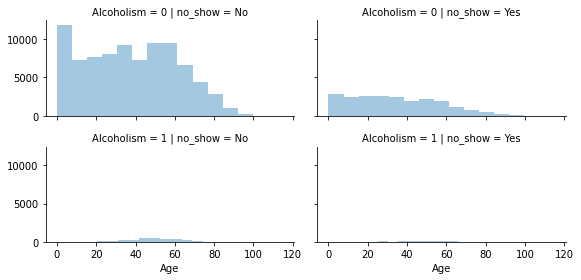

In [48]:
grid = sns.FacetGrid(df, col='no_show', row='Alcoholism', height=2, aspect=2)
grid.map(plt.hist, 'Age', alpha=.4, bins=15)
grid.add_legend();

We can see the most age is 60 they deal with alcohol show

<a id='conclusions'></a>
## Conclusions

Conclusions
Conclusions I have looked into the dataset and managed a few problems like unifying names, removing wrong data. 


- There are many very young people in the dataset (most of them of age 0) but in general the patients age is distributed evenly and the number of patients goes drastricly down for patients older than 60 years.

- The patients are 37 years on average.

- Most of the patients are not alcoholics.

- On average, 20% of appointments were missed.

- Out of 71831 appointments made by females, 14588 were missed with the ratio of 20%.
- Out of 38685 appointments made by males, 7723 were missed with the ratio of 20%.
- The charts confirm about 20% no-show rate for most categories.
-the gender or alcoholic is not a factor to decide if the person would come to his appointment 